# Workshop # 3

In [19]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

In [23]:

df = pd.read_csv("titanic-train.csv")

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
df2 = df.loc[:,['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,NaN,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [25]:
print('Age missing ', df2['Age'].isnull().sum())
print('PClass missing ', df2['Pclass'].isnull().sum())
print('SibSp missing ', df2['SibSp'].isnull().sum())
print('Parch missing ', df2['Parch'].isnull().sum())
print('Survived missing ', df2['Survived'].isnull().sum())

Age missing  177
PClass missing  0
SibSp missing  0
Parch missing  0
Survived missing  0


In [26]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

print('Age missing ', df2['Age'].isnull().sum())

Age missing  0


In [27]:
df2['Survived'] = df2['Survived'].astype('category')

In [28]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df2[['Pclass','Sex','Age','SibSp','Parch']], 
                                                    df2['Survived'], 
                                                    train_size=0.7, 
                                                    random_state=123)
print("Labels for training and testing data")
print(train_X)

Labels for training and testing data
     Pclass     Sex        Age  SibSp  Parch
416       2  female  34.000000      1      1
801       2  female  31.000000      1      1
512       1    male  36.000000      0      0
455       3    male  29.000000      0      0
757       2    male  18.000000      0      0
275       1  female  63.000000      1      0
121       3    male  29.699118      0      0
443       2  female  28.000000      0      0
458       2  female  50.000000      0      0
653       3  female  29.699118      0      0
725       3    male  20.000000      0      0
395       3    male  22.000000      0      0
754       2  female  48.000000      1      2
40        3  female  40.000000      1      0
217       2    male  42.000000      1      0
457       1  female  29.699118      1      0
732       2    male  29.699118      0      0
469       3  female   0.750000      2      1
250       3    male  29.699118      0      0
124       1    male  54.000000      0      1
470       3    mal

/Users/kris/anaconda3/anaconda/envs/softwarepark/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [29]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["male", "female"])
list(le.classes_)
train_X['Sex'] = le.transform(train_X['Sex'])
test_X['Sex'] = le.transform(test_X['Sex'])

In [30]:
train_X

,Pclass,Sex,Age,SibSp,Parch
416,2,0,34.000000,1,1
801,2,0,31.000000,1,1
512,1,1,36.000000,0,0
455,3,1,29.000000,0,0
757,2,1,18.000000,0,0
275,1,0,63.000000,1,0
121,3,1,29.699118,0,0
443,2,0,28.000000,0,0
458,2,0,50.000000,0,0
653,3,0,29.699118,0,0


In [31]:
train_X.dtypes

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
dtype: object

In [32]:
train_y.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [33]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [34]:

clf= tree.DecisionTreeClassifier(max_depth=5)

clf.fit(train_X, train_y)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

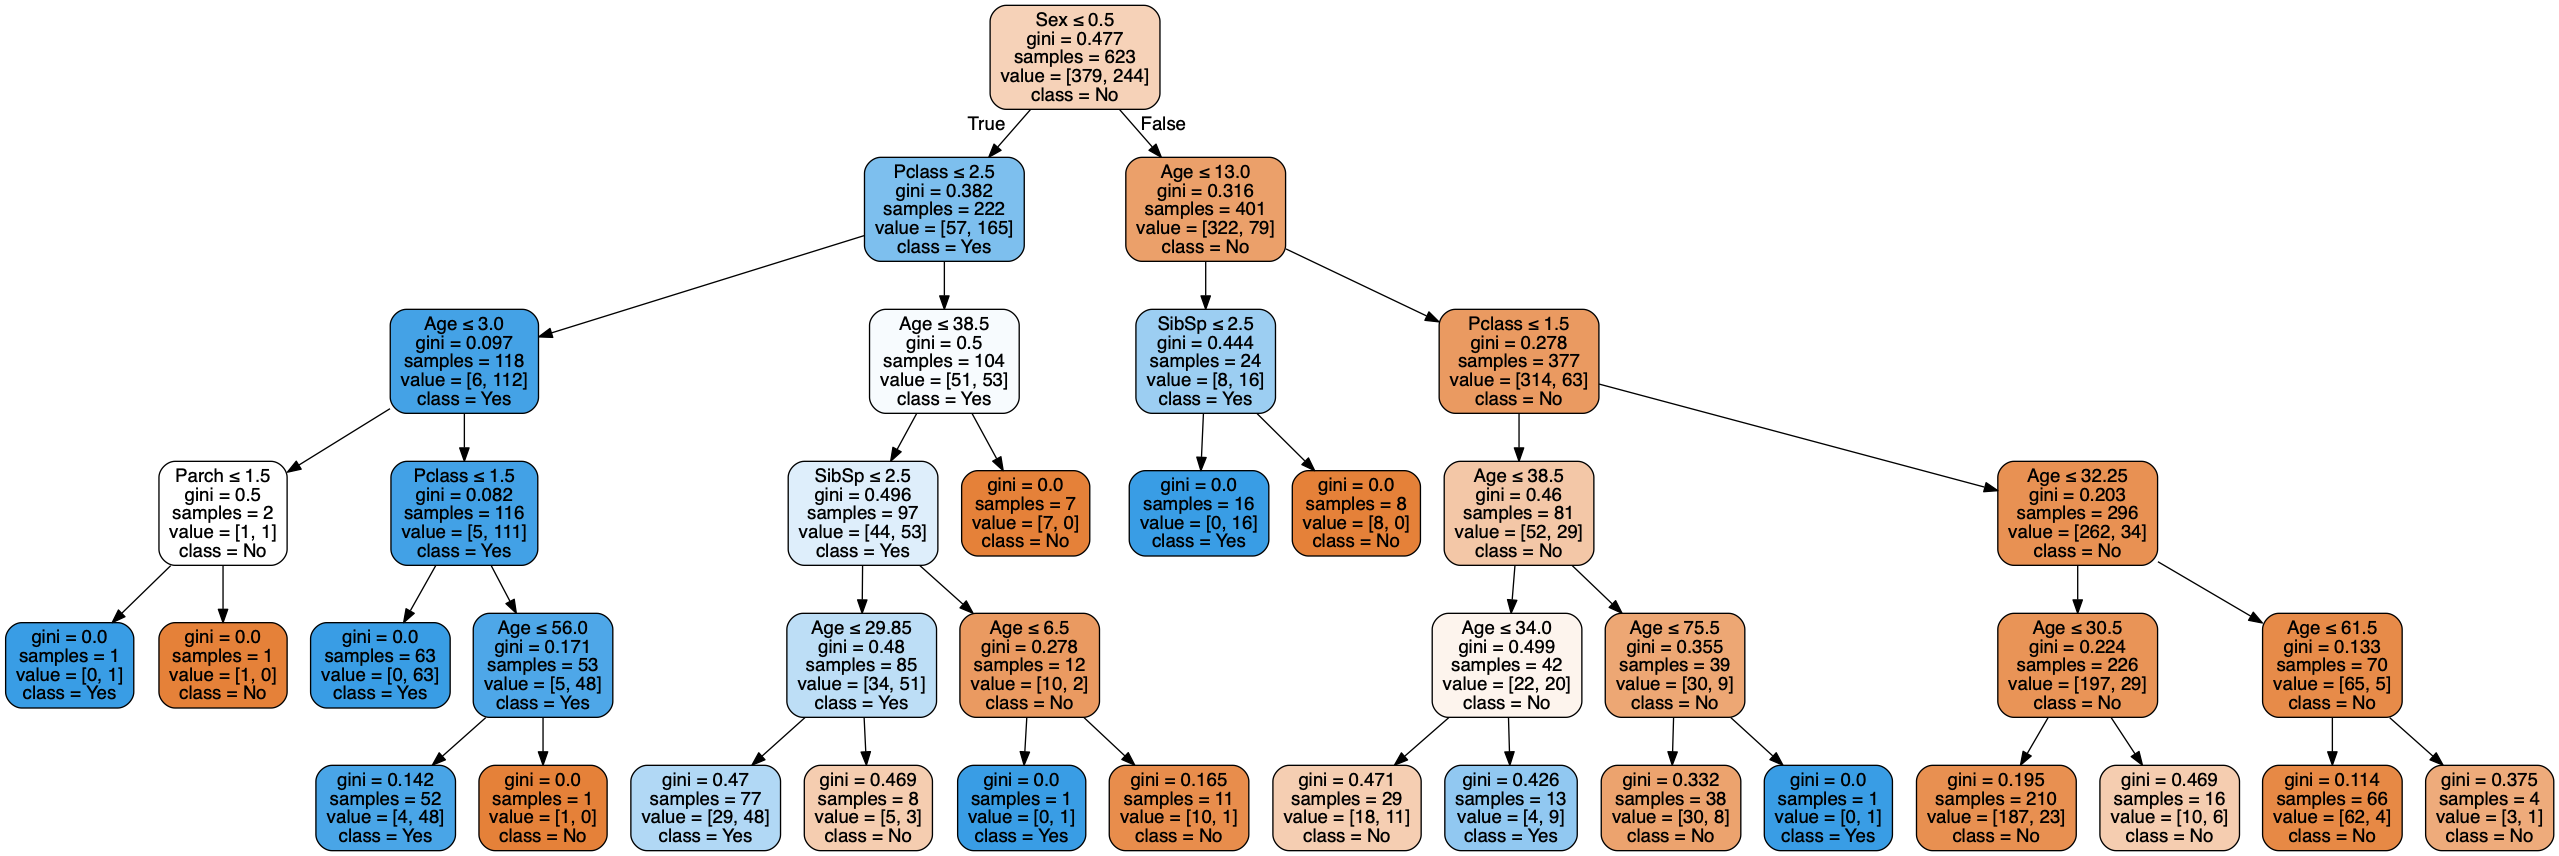

In [35]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], 
                class_names=['No', 'Yes'],filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [36]:
print("Predicting iris on the test set")

y_pred = clf.predict(test_X)


print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))


Predicting iris on the test set
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       170
           1       0.77      0.67      0.72        98

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.81      0.80       268

[[150  20]
 [ 32  66]]


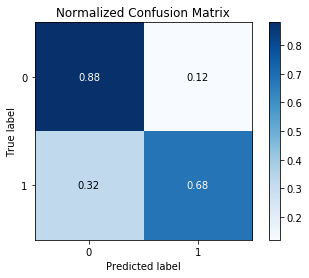

In [34]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(test_y, y_pred, normalize=True)
plt.show()